In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/all.csv')
df = df.drop('url', axis=1)

df = df[df.columns[-50:]]
df["status"] = df["status"].replace({'phishing': 1, "legitimate": 0})

df_corr = df.corr()
df_corr = df_corr.fillna(0)

df_corr = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))

corr = pd.melt(df_corr.reset_index(), id_vars='index')
corr = corr.dropna()
corr.columns = ['x', 'y', 'value']
corr

corr[(corr['y'] == "status") & (corr['value'] = 0.0)]


,x,y,value
2471,ratio_nullHyperlinks,status,0.0
2473,ratio_intRedirection,status,0.0
2475,ratio_intErrors,status,0.0
2480,submit_email,status,0.0
2483,sfh,status,0.0


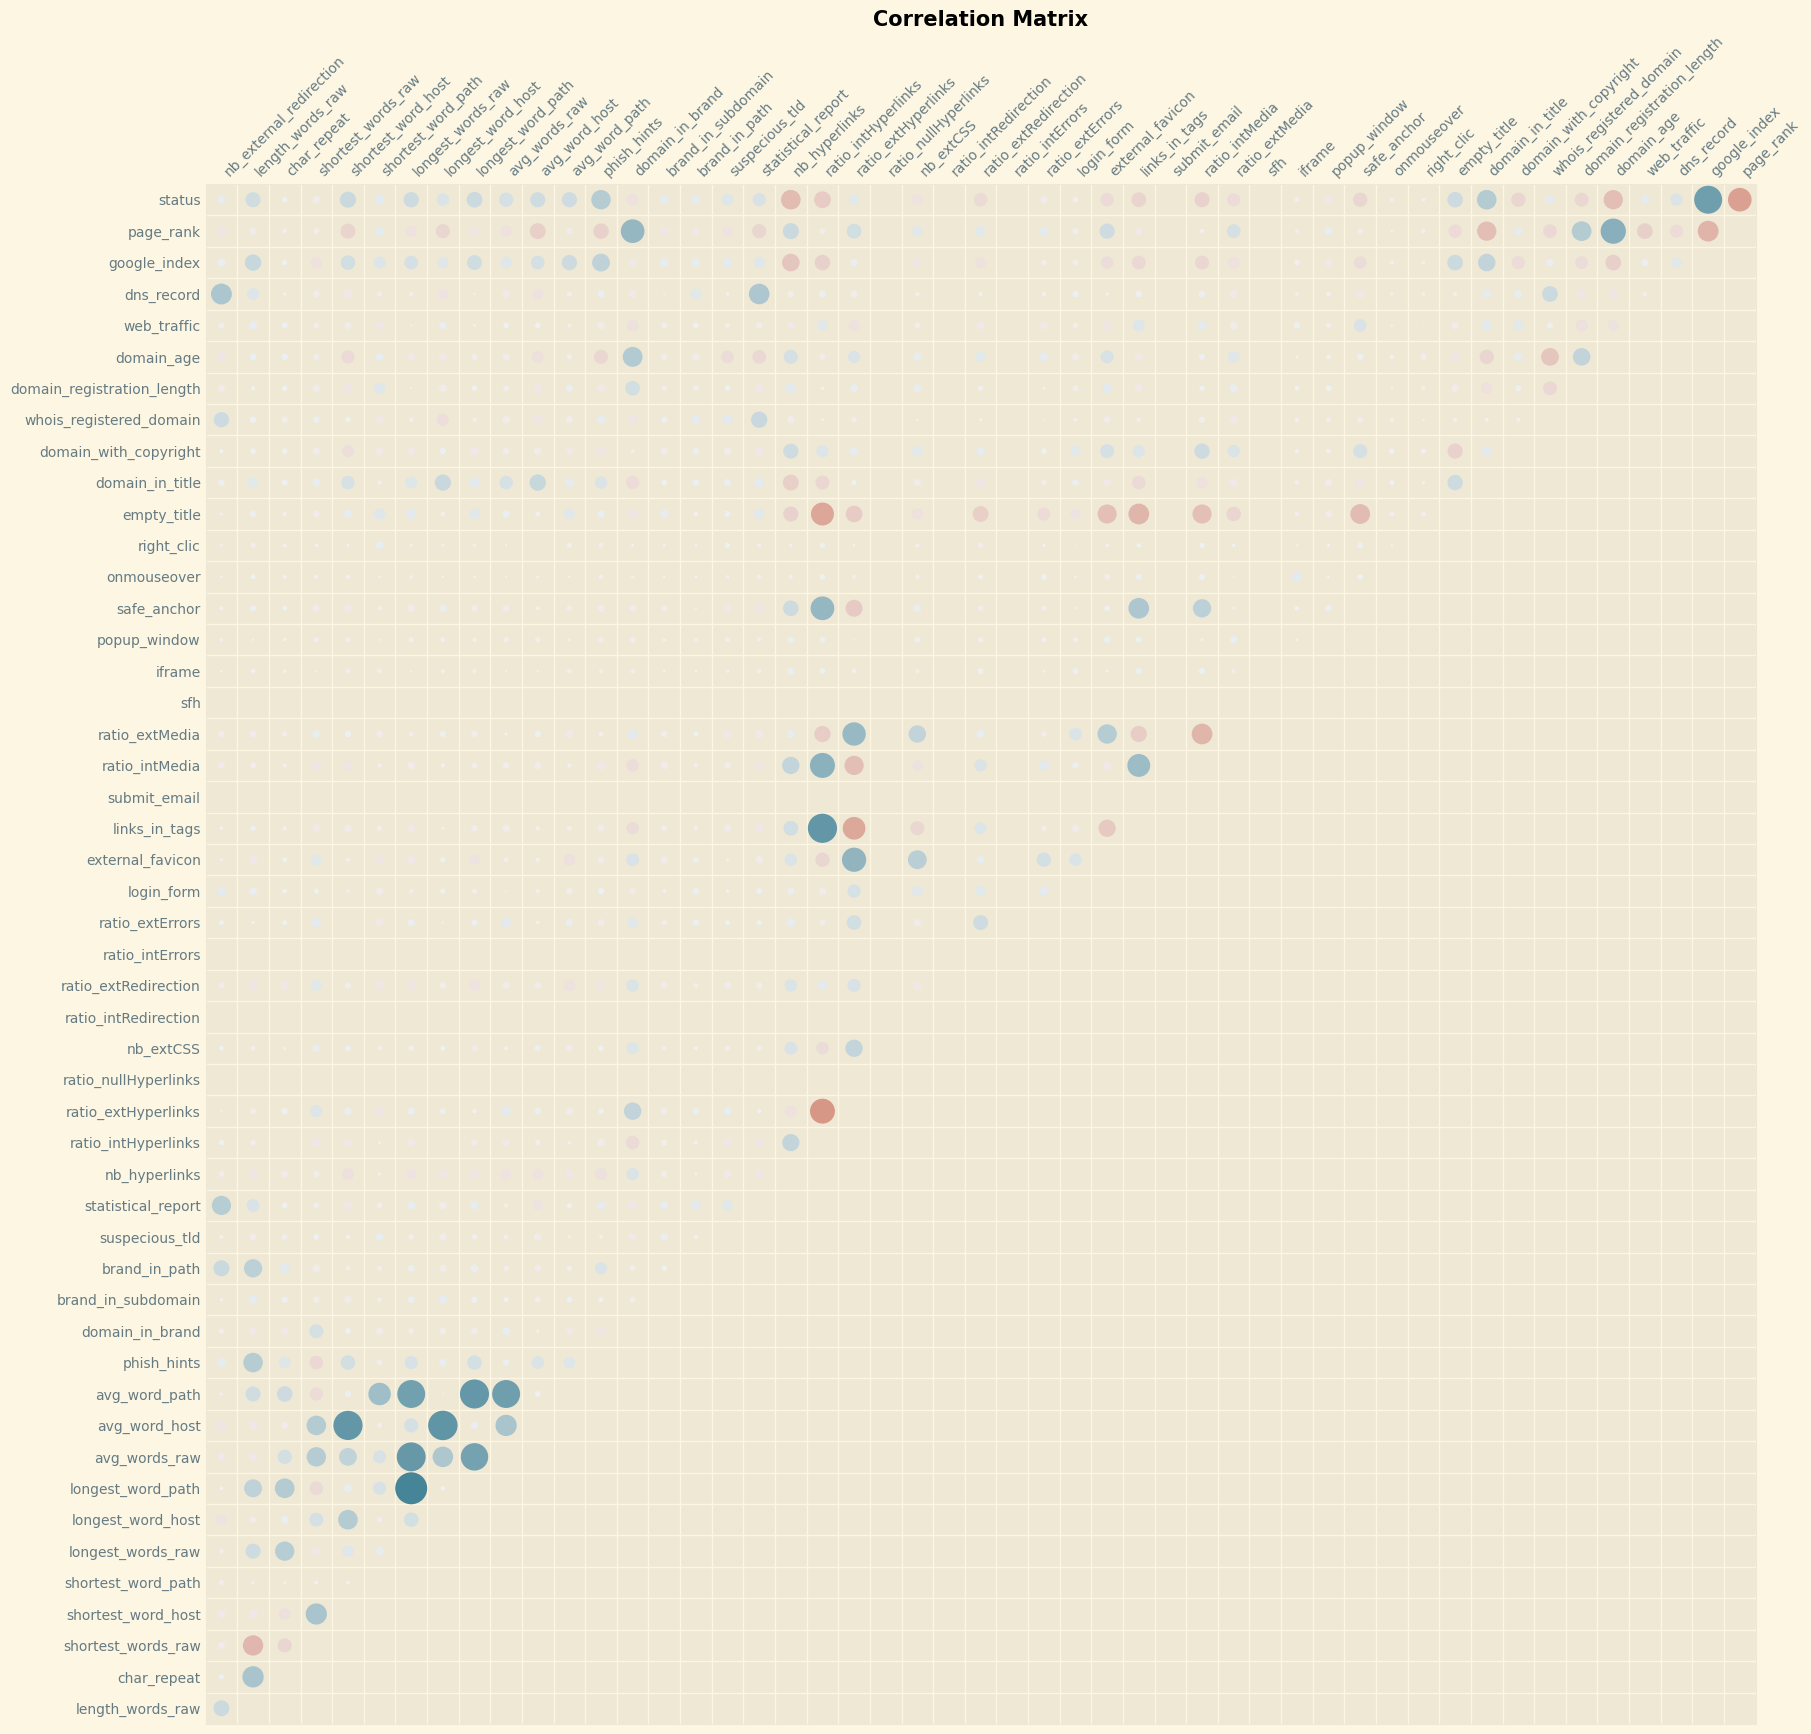

In [253]:


plt.style.use("Solarize_Light2")

def heatmap(x, y, color, size):
    # Mapping from column names to integer coordinates
    # x_labels = [v for v in x.unique()]
    # y_labels = [v for v in y.unique()]
    # x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    # y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500


    n_colors = 256
    palette = sns.diverging_palette(20, 220, n=n_colors) 
    color_min, color_max = [-1, 1]

    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min)
        ind = int(val_position * (n_colors - 1))
        return palette[ind]
    
    ax.scatter(
        x=x,
        y=y,
        s=size * size_scale,
        c=[value_to_color(v) for v in color],
        marker='o',
    )
    
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='left')
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis="both", labelsize=10,  which="both", length=0)

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    # ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    # ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_xlim(-0.5, len(np.unique(x)) -0.5) 
    ax.set_ylim(-0.5, len(np.unique(y)) -0.5)
    ax.set_title("Correlation Matrix", fontweight="bold", fontsize=15)

    

heatmap(
    x=corr['x'],
    y=corr['y'],
    color=corr['value'],
    size=corr['value'].abs()
)